In [1]:
import numpy as np
from numpy.linalg import inv
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
path = 'C:/Users/khoat/OneDrive - National Economics University/Desktop/1. Study/3.1. Machine Learning/data/'

In [3]:
house_dataframe = pd.read_csv(path + 'data_linear.csv')
house_dataframe.rename(columns = {'Diện tích':'area', 'Giá':'price'}, inplace = True)

In [4]:
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
boston_dataframe = pd.read_csv(path + 'housing.csv', header=None, delimiter=r"\s+", names=column_names)

CRIM - per capita crime rate by town

ZN - proportion of residential land zoned for lots over 25,000 sq.ft.

INDUS - proportion of non-retail business acres per town.

CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)

NOX - nitric oxides concentration (parts per 10 million)

RM - average number of rooms per dwelling

AGE - proportion of owner-occupied units built prior to 1940

DIS - weighted distances to five Boston employment centres

RAD - index of accessibility to radial highways

TAX - full-value property-tax rate per $10,000

PTRATIO - pupil-teacher ratio by town

B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town

LSTAT - % lower status of the population

MEDV - Median value of owner-occupied homes in $1000's

In [5]:
class LinearRegression:
    def __init__(self, df, target):
        self.df = df
        self.target = target

    def find_coefficient(self):
        t = np.array(self.df[self.target]).reshape(self.df.shape[0],1)
        feature = np.array(self.df.loc[:, self.df.columns != self.target]).reshape(self.df.shape[0], self.df.shape[1]-1)
        x = np.concatenate((np.ones((self.df.shape[0], 1)), feature), axis= 1)
        w = np.array(inv(x.T.dot(x)).dot(x.T).dot(t)).reshape(feature.shape[1]+1, 1)
        return w

    def predict_value(self, list1):
        array = np.array(list1).reshape(1,len(list1))
        w = self.find_coefficient()
        return array.dot(w[1:,]) + w[0]

    def add_predict_column(self):
        newdf = self.df.copy()
        t = np.array(self.df[self.target]).reshape(self.df.shape[0],1)
        feature = np.array(self.df.loc[:, self.df.columns != self.target]).reshape(self.df.shape[0], self.df.shape[1]-1)
        x = np.concatenate((np.ones((self.df.shape[0], 1)), feature), axis= 1)
        w = np.array(inv(x.T.dot(x)).dot(x.T).dot(t)).reshape(feature.shape[1]+1, 1)
        newdf['predict'] = feature.dot(w[1:,]) + w[0]
        return newdf

    def print_model(self):
        w = self.find_coefficient()
        print('y =', end=' ')
        for i in range(1, len(w)):
            print(str(w[i][0]), self.df.columns[i-1], '+', end=' ')
        print(str(w[0][0]))

In [6]:
house = LinearRegression(house_dataframe, 'price')
house.print_model()

y = 15.211090799670421 area + -7.064268645243487


In [7]:
print(house.predict_value([50]))
print(house.predict_value([100]))
print(house.predict_value([150]))

[[753.49027134]]
[[1514.04481132]]
[[2274.59935131]]


In [8]:
house_predict = house.add_predict_column()
house_predict.head()

,area,price,predict
0,30.0000,448.524,449.268455
1,32.4138,509.248,485.984986
2,34.8276,535.104,522.701517
3,37.2414,551.432,559.418048
4,39.6552,623.418,596.134579


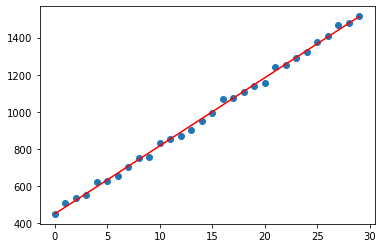

In [9]:
plt.scatter(house_predict.index, house_predict.price)
plt.plot(house_predict.predict,'red')

In [10]:
boston = LinearRegression(boston_dataframe, 'MEDV')
boston.find_coefficient()
boston.print_model()

y = -0.10801135783677955 CRIM + 0.04642045836688676 ZN + 0.02055862636716503 INDUS + 2.6867338193460037 CHAS + -17.766611228295282 NOX + 3.809865206810706 RM + 0.000692224640346243 AGE + -1.4755668455999065 DIS + 0.30604947898516055 RAD + -0.012334593916578011 TAX + -0.9527472317068831 PTRATIO + 0.009311683273796997 B + -0.5247583778554239 LSTAT + 36.4594883850676


In [11]:
boston_predict = boston.add_predict_column()
boston_predict.sort_values(by= 'predict', ascending=True, inplace= True)
boston_predict.reset_index(inplace= True)
boston_predict.head()

,index,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,predict
0,414,45.74610,0.0,18.10,0,0.693,4.519,100.0,1.6582,24,666.0,20.2,88.27,36.98,7.0,-4.281311
1,374,18.49820,0.0,18.10,0,0.668,4.138,100.0,1.1370,24,666.0,20.2,396.90,37.97,13.8,0.777798
2,412,18.81100,0.0,18.10,0,0.597,4.628,100.0,1.5539,24,666.0,20.2,28.79,34.37,17.9,1.718518
3,384,20.08490,0.0,18.10,0,0.700,4.368,91.2,1.4395,24,666.0,20.2,285.83,30.63,8.8,3.279181
4,490,0.20746,0.0,27.74,0,0.609,5.093,98.0,1.8226,4,711.0,20.1,318.43,29.68,8.1,3.663997


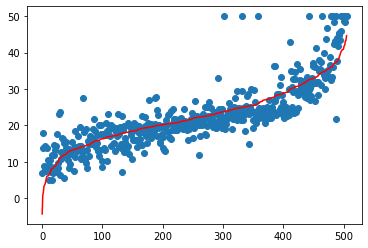

In [12]:
plt.scatter(boston_predict.index, boston_predict.MEDV)
plt.plot(boston_predict.predict,'r')